In [305]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set()

In [306]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [307]:
df = sns.load_dataset("tips")

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [309]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [310]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [311]:
df['tip'] = df['tip'].map(lambda x: 1 if x>2.99 else 0)

In [312]:
X = df.drop('tip', axis=1)

In [313]:
Y = df['tip']

In [314]:
X = pd.concat([X,pd.get_dummies(X['sex'], prefix='sex', drop_first=True)], axis=1)
X.drop("sex", axis=1, inplace=True)
X = pd.concat([X,pd.get_dummies(X['smoker'], prefix='smoker', drop_first=True)], axis=1)
X.drop("smoker", axis=1, inplace=True)

In [315]:
X.rename(columns={"smoker_No": "non_smoker", "sex_Female": "Female"}, inplace=True)

In [316]:
X.head()

,total_bill,day,time,size,Female,non_smoker
0,16.99,Sun,Dinner,2,1,1
1,10.34,Sun,Dinner,3,0,1
2,21.01,Sun,Dinner,3,0,1
3,23.68,Sun,Dinner,2,0,1
4,24.59,Sun,Dinner,4,1,1


In [317]:
X = pd.concat([X,pd.get_dummies(X['day'], prefix='day')], axis=1)

X.drop("day", axis=1, inplace=True)

X = pd.concat([X,pd.get_dummies(X['time'], prefix='time')], axis=1)
X.drop("time", axis=1, inplace=True)



In [318]:
X.rename(columns={"Female": "sex", "non_smoker": "smoker"}, inplace=True)

In [319]:
inv = {0 : 1, 1 : 0}

In [320]:
X["sex"] = X["sex"].map(inv)

In [321]:
X["smoker"] = X["smoker"].map(inv)

In [322]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_bill   244 non-null    float64
 1   size         244 non-null    int64  
 2   sex          244 non-null    int64  
 3   smoker       244 non-null    int64  
 4   day_Thur     244 non-null    uint8  
 5   day_Fri      244 non-null    uint8  
 6   day_Sat      244 non-null    uint8  
 7   day_Sun      244 non-null    uint8  
 8   time_Lunch   244 non-null    uint8  
 9   time_Dinner  244 non-null    uint8  
dtypes: float64(1), int64(3), uint8(6)
memory usage: 9.2 KB


In [323]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1, stratify=Y)

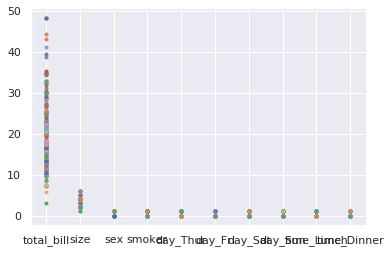

In [324]:
plt.plot(X_train.T, ".")
plt.show()

In [325]:
class Perceptron:
    def __init__(self):
        self.w = None
        self.b = None
    
    def model(self, x):
        return 1 if (np.dot(x,self.w) >= self.b) else 0
    
    def predict(self,X):
        Y = []
        for x in X:
            y_pred = self.model(x)
            Y.append(y_pred)
        return np.array(Y)
    
    def fit(self, X , Y, lr=1, epochs=10):
        
        self.w = np.ones(X.shape[1])
        self.b = 0
        
        max_acc = 0
        
        
        
        accuracy = {}
        
        for i in range(epochs):
            
            for (x,y) in zip(X,Y):
                y_pred = self.model(x)
                
                if y == 1 and y_pred == 0:
                    self.w = self.w + lr * x
                    self.b = self.b + lr * 1
                
                elif y == 0 and y_pred == 1:
                    self.w = self.w - lr * x
                    self.b = self.b - lr * 1
                    
            accuracy[i] = accuracy_score(self.predict(X), Y)
                
            if accuracy[i] > max_acc:
                max_acc = accuracy[i]
                max_wt = self.w
                max_b = self.b
                
        
        self.w = max_wt
        self.b = max_b
        
        plt.plot(*zip(*sorted(accuracy.items())))
        plt.show()
                
        print(max_acc)        
        

In [326]:
perceptron = Perceptron()

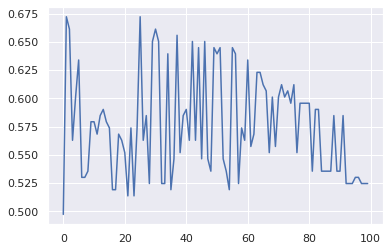

0.6721311475409836


In [327]:
perceptron.fit(X_train.values, Y_train.values, epochs=100)

In [328]:
Y_pred = perceptron.predict(X_test.values)

acc = accuracy_score(Y_pred, Y_test.values)

In [329]:
acc

0.7540983606557377

# Oh yeah !!

In [330]:
X_test.shape

(61, 10)

In [331]:
X_train.shape

(183, 10)